In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_absolute_percentage_error
from sklearn.svm import SVR


In [43]:
print(np)

<module 'numpy' from 'C:\\Users\\EVANS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\numpy\\__init__.py'>


In [3]:
gold_data=pd.read_csv(r"C:\Users\EVANS\OneDrive\Desktop\python\gld_price_data.csv")

In [4]:
gold_data.head(4)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299


In [5]:
gold_data.tail(4)

,Date,SPX,GLD,USO,SLV,EUR/USD
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe().round(2)

,SPX,GLD,USO,SLV,EUR/USD
count,2290.00,2290.00,2290.00,2290.00,2290.00
mean,1654.32,122.73,31.84,20.08,1.28
std,519.11,23.28,19.52,7.09,0.13
min,676.53,70.00,7.96,8.85,1.04
25%,1239.87,109.73,14.38,15.57,1.17
50%,1551.43,120.58,33.87,17.27,1.30
75%,2073.01,132.84,37.83,22.88,1.37
max,2872.87,184.59,117.48,47.26,1.60


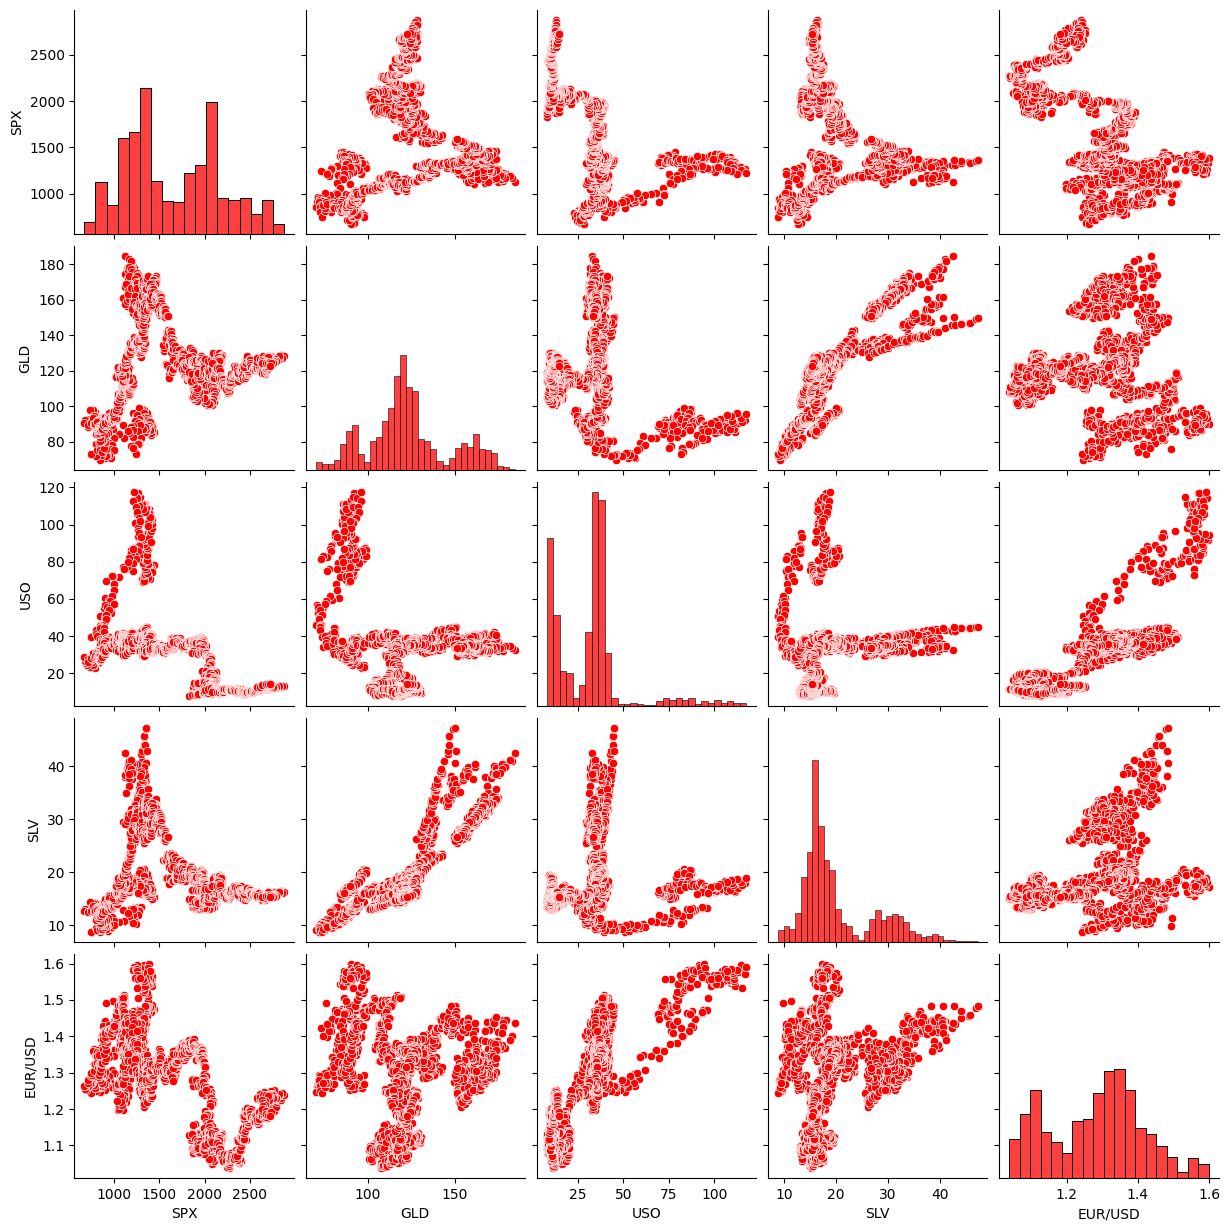

In [10]:
sns.pairplot(gold_data, 
             plot_kws={'color':'red'}, 
             diag_kws={'color':'red', 'edgecolor':'black'})

In [11]:
correlation = gold_data.drop(['Date'],axis=1).corr()

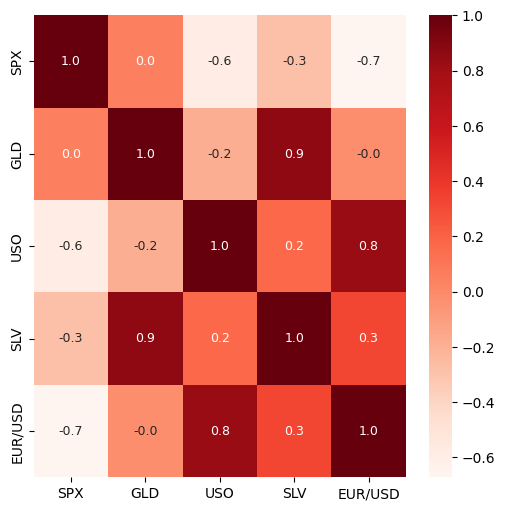

In [12]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=False, fmt=".1f", annot=True, annot_kws={"size":9}, cmap="Reds");

In [13]:
correlation["GLD"].sort_values(ascending=False).round(2)

GLD        1.00
SLV        0.87
SPX        0.05
EUR/USD   -0.02
USO       -0.19
Name: GLD, dtype: float64

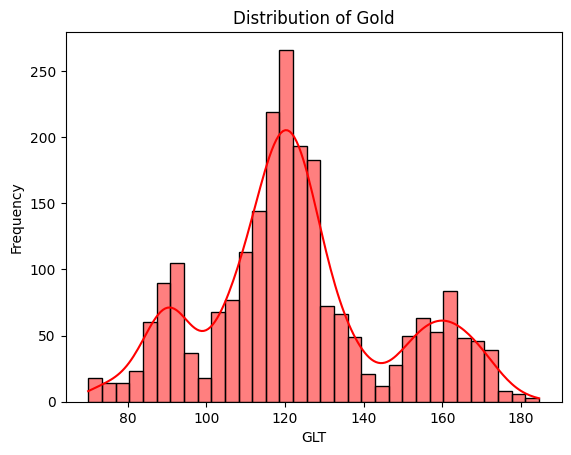

In [14]:
#Checking the distribution of the gold price
sns.histplot(gold_data["GLD"],color="Red",kde=True)
plt.title("Distribution of Gold")
plt.xlabel("GLT")
plt.ylabel("Frequency");

In [15]:
gold_data=gold_data.drop(columns="Date",axis=1)

In [16]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [17]:
#Splitting features and target
x=gold_data.drop(["GLD"],axis=1)
y=gold_data["GLD"]

In [18]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [19]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [20]:
#Splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
#Linear Regression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
print("Linear regression Train score :",linear_reg.score(x_train,y_train))
print("Linear regression Test score :", linear_reg.score(x_test,y_test))

Linear regression Train score : 0.8848907552292871
Linear regression Test score : 0.8682389169597781


In [22]:
linear_reg_y_pred= linear_reg.predict(x_test)

In [23]:
MAPE=mean_absolute_percentage_error(y_test,linear_reg_y_pred)
absolute_linear_reg=1-MAPE
print("Accuracy linear regression :",absolute_linear_reg)

Accuracy linear regression : 0.9503672448025435


In [24]:
#RandomForestRegressor//ExtraTreesRegressor
random_reg=RandomForestRegressor(n_estimators=100,random_state=100)
extra_reg=ExtraTreesRegressor(n_estimators=100,random_state=100)

In [25]:
random_reg.fit(x_train,y_train)
print("Random regressor Test score :", random_reg.score(x_test,y_test))
print("Random regressor Train score :", linear_reg.score(x_train,y_train))

Random regressor Test score : 0.9885745286161554
Random regressor Train score : 0.8848907552292871


In [26]:
extra_reg.fit(x_train,y_train)
print("Extra regressor Test score :", extra_reg.score(x_test,y_test))
print("Extra regressor Train score :", extra_reg.score(x_train,y_train))

Extra regressor Test score : 0.9924010220486444
Extra regressor Train score : 1.0


In [27]:
random_reg_y_pred=random_reg.predict(x_test)
extra_reg_y_pred=extra_reg.predict(x_test)

In [28]:
#R2 value for Random and Extra regressors
extra_reg_r2_score=r2_score(y_test,extra_reg_y_pred)
print("Extra Regressor r2 score :",extra_reg_r2_score)

Rnadom_reg_r2_score=r2_score(y_test,random_reg_y_pred)
print("Random Regressor r2 score :",Rnadom_reg_r2_score)

Extra Regressor r2 score : 0.9924010220486444
Random Regressor r2 score : 0.9885745286161554


In [29]:
#M2 value for Extra and Random regressor
MAPE=mean_absolute_percentage_error(y_test,extra_reg_y_pred)
absolute_extra_reg=1-MAPE
print("Accuracy extra regressor :",absolute_extra_reg)

MAPE=mean_absolute_percentage_error(y_test,random_reg_y_pred)
accuracy_random_reg=1-MAPE
print("Accuracy random regressor :",accuracy_random_reg)

Accuracy extra regressor : 0.9913983035108913
Accuracy random regressor : 0.9889760262097615


In [30]:
#Support Vector Regressor
svm=SVR(kernel="linear")
svm.fit(x_train,y_train)

print("SVM regressor Test score :", svm.score(x_test,y_test))
print("SVM regressor Train score :", svm.score(x_train,y_train))

SVM regressor Test score : 0.8176885930545061
SVM regressor Train score : 0.8516324377785536


In [31]:
svm_y_pred=svm.predict(x_test)
svm_r2_score=r2_score(y_test,svm_y_pred)
print("SVM r2 score :",svm_r2_score)

MAPE=mean_absolute_percentage_error(y_test,svm_y_pred)
absolute_svm=1-MAPE
print("Accuracy random regressor :",absolute_svm)


SVM r2 score : 0.8176885930545061
Accuracy random regressor : 0.9568178261859123


In [32]:
predicted_df=pd.DataFrame({
    "linear_reg_y_pred":linear_reg_y_pred,
    "extra_reg_y_pred":extra_reg_y_pred,
    "random_reg_y_pred":random_reg_y_pred,
    "svm_y_pred":svm_y_pred,
    "y_test":y_test
})

In [33]:
predicted_df.head()

,linear_reg_y_pred,extra_reg_y_pred,random_reg_y_pred,svm_y_pred,y_test
336,95.271044,92.972700,92.219000,93.550386,92.110001
582,117.060265,122.773298,122.154599,117.177416,122.709999
165,78.791452,73.367500,73.275600,72.773493,74.000000
322,93.561981,90.892701,91.042000,91.383789,91.250000
1235,127.452606,132.253400,132.210901,130.901548,132.449997


In [34]:
best_model=[]
for ind in predicted_df.index:
    predicted_value=np.array(predicted_df[predicted_df.index==ind].values[0])
    predicted_value=np.abs(predicted_value[:-1] - predicted_value[-1])
    best_model.append(predicted_df.columns[np.argmin(predicted_value)])

predicted_df["best_model"]=best_model

In [35]:
predicted_df.head()

,linear_reg_y_pred,extra_reg_y_pred,random_reg_y_pred,svm_y_pred,y_test,best_model
336,95.271044,92.972700,92.219000,93.550386,92.110001,random_reg_y_pred
582,117.060265,122.773298,122.154599,117.177416,122.709999,extra_reg_y_pred
165,78.791452,73.367500,73.275600,72.773493,74.000000,extra_reg_y_pred
322,93.561981,90.892701,91.042000,91.383789,91.250000,svm_y_pred
1235,127.452606,132.253400,132.210901,130.901548,132.449997,extra_reg_y_pred


In [36]:
print("No of rows and Columns :",predicted_df.shape)
print(predicted_df["best_model"].value_counts())

No of rows and Columns : (458, 6)
best_model
extra_reg_y_pred     245
random_reg_y_pred    150
svm_y_pred            44
linear_reg_y_pred     19
Name: count, dtype: int64


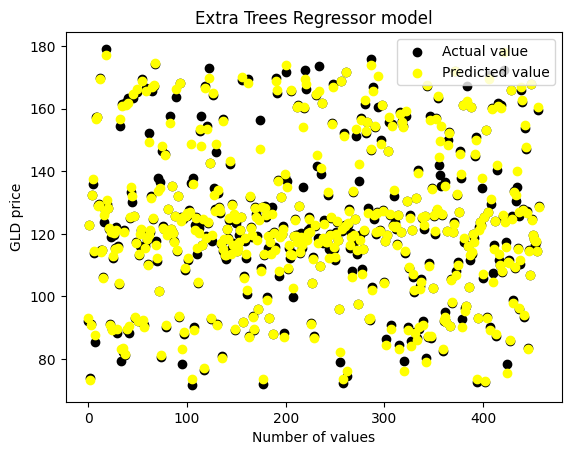

In [37]:
#Plot using the predicted Extra Trees Regressor model
plt.scatter(range(len(y_test)), y_test, color="black", label="Actual value")
plt.scatter(range(len(random_reg_y_pred)), extra_reg_y_pred, color="yellow", label="Predicted value")
plt.title("Extra Trees Regressor model")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend();

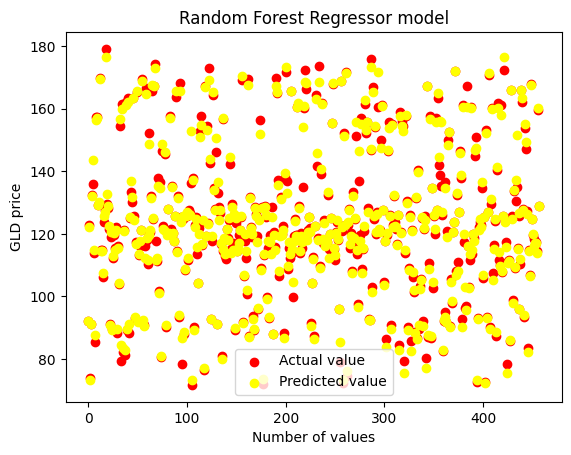

In [38]:
#Plot using the predicted Random Forest Regressor model
plt.scatter(range(len(y_test)), y_test, color="Red", label="Actual value")
plt.scatter(range(len(random_reg_y_pred)), random_reg_y_pred, color="yellow", label="Predicted value")
plt.title("Random Forest Regressor model")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend();

In [39]:
#ploting to check the actual and predicted
plt.scatter(y_test,color="black",label="Actual value")
plt.scatter(random_reg_y_pred,color="yellow",label="Predicted value")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend();

TypeError: scatter() missing 1 required positional argument: 'y'